# Model Training

In [1]:
%load_ext autoreload
%autoreload 2
    
import common
import pandas as pd
import scipy.sparse
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 1. Load dataset

In [5]:
df = pd.read_csv("scicite_preprocessed/train.csv")
label_encoder = joblib.load('scicite_preprocessed/label_encoder.pkl')

## 2. Train-validation split

In [6]:
X = df.drop(columns=['label'])
y = df["label"]

# Split into 80% train and 20% validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Train Logistic Regression 

Logistic Regression
-----Evaluation-----
Accuracy: 0.8338
Macro F1-score: 0.8030
              precision    recall  f1-score   support

  background       0.82      0.93      0.87       968
      method       0.85      0.71      0.78       459
      result       0.86      0.68      0.76       222

    accuracy                           0.83      1649
   macro avg       0.85      0.77      0.80      1649
weighted avg       0.84      0.83      0.83      1649



/home/brina/miniconda3/envs/nlp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


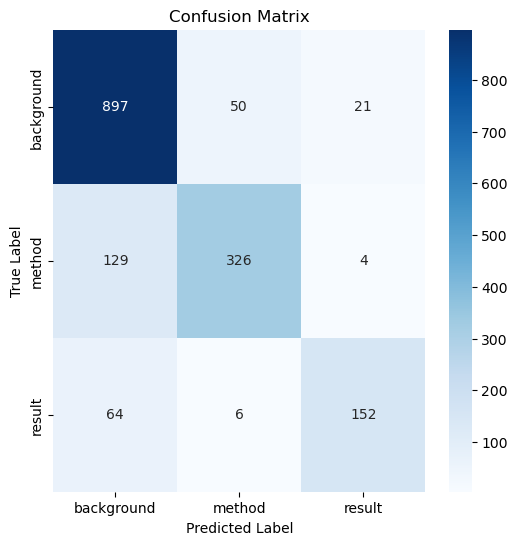

In [7]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

common.evaluate(y_val, y_pred, label_encoder, "Logistic Regression")

## 4. Train Random Forest Classifier

Random Forest Classifier
-----Evaluation-----
Accuracy: 0.8381
Macro F1-score: 0.8035
              precision    recall  f1-score   support

  background       0.82      0.94      0.88       968
      method       0.86      0.73      0.79       459
      result       0.91      0.64      0.75       222

    accuracy                           0.84      1649
   macro avg       0.86      0.77      0.80      1649
weighted avg       0.84      0.84      0.83      1649



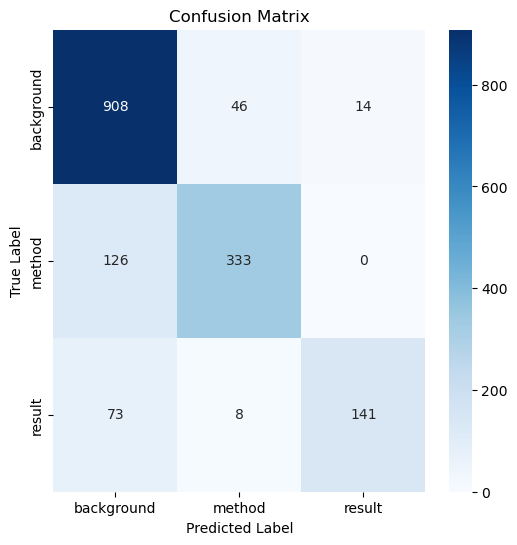

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

common.evaluate(y_val, y_pred_rf, label_encoder, "Random Forest Classifier")

## 5. Train Support Vector Machine (SVM)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)

common.evaluate(y_val, y_pred_svm, label_encoder, "Support Vector Machine (SVM)")